In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks

from process_video_to_tracks import process_video_to_tracks
from transform_coordinates import transform_coordinates
from smooth_data import smooth_data
from label_decision import label_decision
from trial_analysis import trial_analysis
from get_kinematic_features import get_displacement
from get_kinematic_features import get_velocity
from get_kinematic_features import get_acceleration
from straight_walking_speed import straight_walking_speed
from straight_walking_speed import plot_straight_walking_speed

In [108]:
h5_folder = '/Users/yang/Documents/Wilbrecht_Lab/SLEAP_Analysis'

df = transform_coordinates(h5_folder)

In [109]:
df.describe()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y
count,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000,8464.000000
mean,197.717966,114.923718,197.494388,115.381345,197.019537,115.951444,196.255624,116.783162,300.437936,46.358139,298.264516,48.415370,294.416405,52.900559,290.469302,58.277935
std,37.888072,32.720828,36.879396,31.769014,36.156437,31.150517,37.143450,31.823774,32.679471,27.264341,29.613069,28.983188,24.146067,32.380587,19.381510,35.614522
min,72.893837,6.871726,67.981125,6.762043,56.143082,6.479196,47.356556,5.199690,144.981227,8.083604,148.222573,12.154951,155.541197,14.738977,165.575556,11.231542
25%,180.234901,97.069988,180.098286,100.131662,179.812412,103.075743,179.655251,103.922201,288.851159,30.556371,288.789346,31.611429,288.293999,30.928351,286.103982,32.218048
50%,199.103294,119.612194,196.499649,119.295856,196.314369,119.264549,195.945427,119.060051,300.666522,36.872361,299.035844,36.377978,295.167673,37.930131,291.696222,43.625430
75%,212.433983,136.781696,212.637238,136.017944,212.623241,133.034786,212.107300,131.537861,324.047552,49.694699,319.347354,55.060456,309.217023,65.380039,299.848592,76.759085
max,340.073547,216.223129,336.354889,220.858673,327.984589,232.144623,327.993835,240.918869,354.215610,149.808692,347.801238,153.021961,337.473878,163.940773,332.499546,172.007411


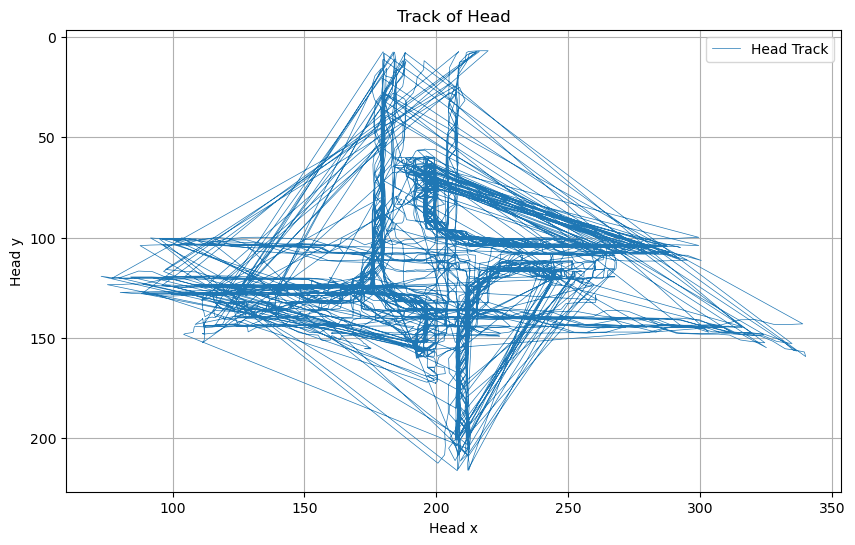

In [110]:
start_frame, stop_frame = 0000, 8000
head_x = df['Head x'][start_frame:stop_frame]
head_y = df['Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

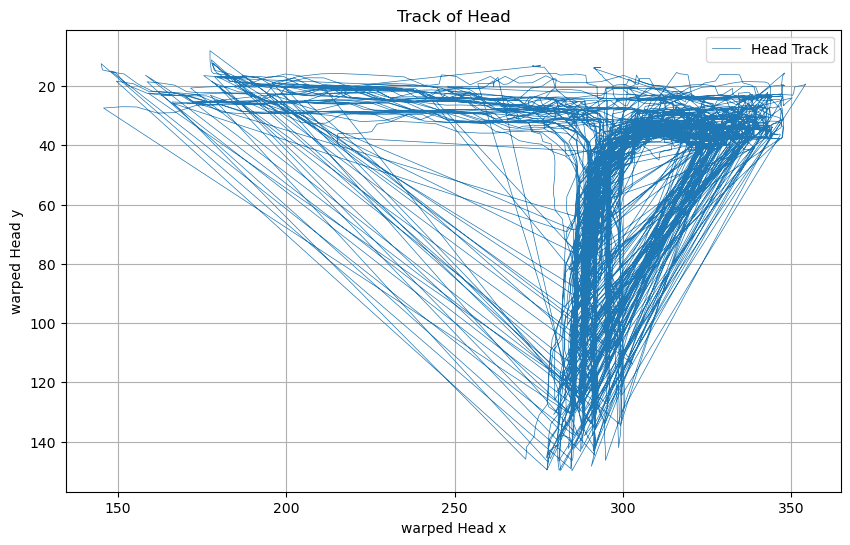

In [111]:
start_frame, stop_frame = 0000, 8000
head_x = df['warped Head x'][start_frame:stop_frame]
head_y = df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [112]:

'''
plot_df = df[1:400]
x = np.linspace(1, len(df), len(df))
sns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')
plt.title('Head Y-Coordinate Over Time')
plt.xlabel('Frames')
plt.ylabel('Head Y-Coordinate')
#plt.xlim(0, )
plt.grid(True)
plt.show()
'''

"\nplot_df = df[1:400]\nx = np.linspace(1, len(df), len(df))\nsns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')\nplt.title('Head Y-Coordinate Over Time')\nplt.xlabel('Frames')\nplt.ylabel('Head Y-Coordinate')\n#plt.xlim(0, )\nplt.grid(True)\nplt.show()\n"

In [113]:
'''
smoothed_data = {}
x = len(df)
grid = np.linspace(1, x, x)

for column in df.columns:
    y = df[column]
    spline = make_smoothing_spline(grid, y)
    smoothed_data[column] = spline(grid)

smoothed_df = pd.DataFrame(smoothed_data, index=df.index)

smoothed_df.head(20)
'''

'\nsmoothed_data = {}\nx = len(df)\ngrid = np.linspace(1, x, x)\n\nfor column in df.columns:\n    y = df[column]\n    spline = make_smoothing_spline(grid, y)\n    smoothed_data[column] = spline(grid)\n\nsmoothed_df = pd.DataFrame(smoothed_data, index=df.index)\n\nsmoothed_df.head(20)\n'

In [114]:
'''
#plt.figure(figsize=(15, 6))
sns.lineplot(data=smoothed_data['Head yCoordinates'][:400])
'''

"\n#plt.figure(figsize=(15, 6))\nsns.lineplot(data=smoothed_data['Head yCoordinates'][:400])\n"

In [115]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

In [116]:
# Smooth the data
columns_to_smooth = [
    'warped Head x', 'warped Head y',
    'warped Neck x', 'warped Neck y',
    'warped Torso x', 'warped Torso y',
    'warped Tailhead x', 'warped Tailhead y'
]

smoothed_df = smooth_data(df, columns_to_smooth)

In [117]:
smoothed_df.describe()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time
count,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000
mean,198.970426,115.251349,198.571134,115.623527,197.748564,116.082891,196.699171,116.872617,301.401703,48.777739,299.085475,50.839299,294.954836,55.346249,290.745838,60.664430,0.930578
std,39.040235,33.978720,38.219222,33.217700,37.780395,32.877385,38.991584,33.710798,32.471895,28.771846,29.507480,30.627349,24.133300,34.151545,19.448044,37.427589,0.682733
min,72.893837,6.871726,67.981125,6.762043,56.143082,6.479196,47.356556,5.199690,144.807957,8.447945,147.979540,12.415683,155.503263,18.076325,165.575550,12.344548,0.000000
25%,180.787083,96.473961,180.437073,99.656687,180.013420,101.036041,179.830456,103.773149,289.192829,32.127840,288.942035,32.426403,288.235562,31.713371,286.074339,32.447316,0.433333
50%,199.123070,119.991497,196.468445,119.425369,196.354614,119.279346,196.089783,119.013569,301.767148,37.154557,299.264544,36.557323,295.375594,38.369257,291.736690,44.447636,0.866667
75%,215.851028,139.266727,215.603989,136.719227,215.272202,135.672588,212.700882,131.685154,324.547239,56.028228,319.786984,61.470595,310.354154,72.328867,300.183843,83.195168,1.300000
max,340.073547,216.223129,336.354889,220.858673,327.984589,232.144623,327.993835,240.918869,354.245071,150.088072,347.823869,153.110638,337.487981,163.292043,332.490600,172.128169,4.666667


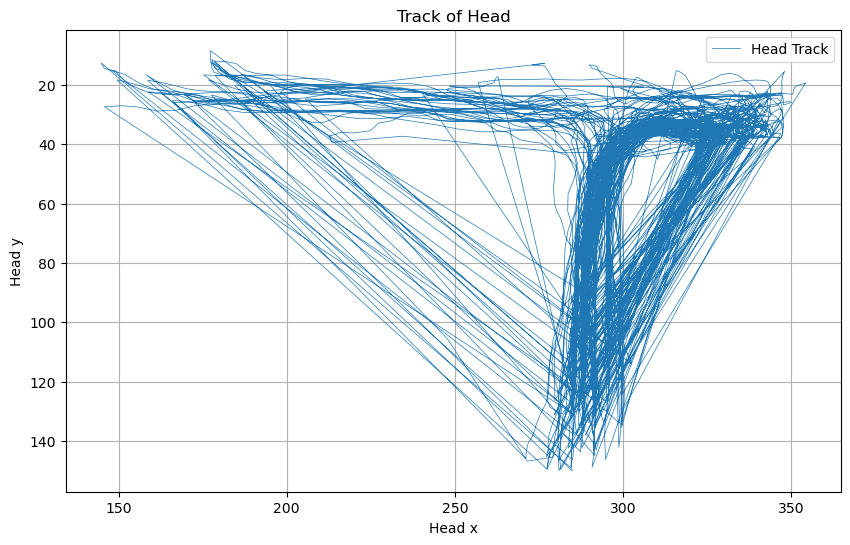

In [118]:
start_frame, stop_frame = 0000, 7000
head_x = smoothed_df['warped Head x'][start_frame:stop_frame]
head_y = smoothed_df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [119]:
labeled_df = label_decision(smoothed_df)

In [120]:
labeled_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time,decision
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,291.434852,118.950001,292.439284,129.982656,291.695481,141.005628,0.000000,None
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,290.051113,114.193846,292.247792,125.226643,289.137712,135.266350,0.033333,None
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,289.291565,109.503944,292.516324,120.501065,291.891907,130.670079,0.066667,None
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,289.014365,105.121609,293.113780,116.111906,293.062162,126.716040,0.100000,None
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,288.917446,101.074858,293.361135,112.109098,293.529058,122.863666,0.133333,None


In [121]:
# calculate velocity
bodyparts = [
    'Head',
    'Neck',
    'Torso',
    'Tailhead'
]

displacement_df = get_displacement(smoothed_df, bodyparts)
velocity_df = get_velocity(displacement_df, bodyparts, frame_rate=30)
acceleration_df = get_acceleration(velocity_df, bodyparts, frame_rate=30)

In [122]:
acceleration_df.to_csv('data_df.csv')

In [123]:
trial_df = trial_analysis(acceleration_df)

In [124]:
trial_df.head()

,trial_num,final_decision
0,0,Acc
1,1,Acc
2,2,Acc
3,3,Acc
4,4,Acc


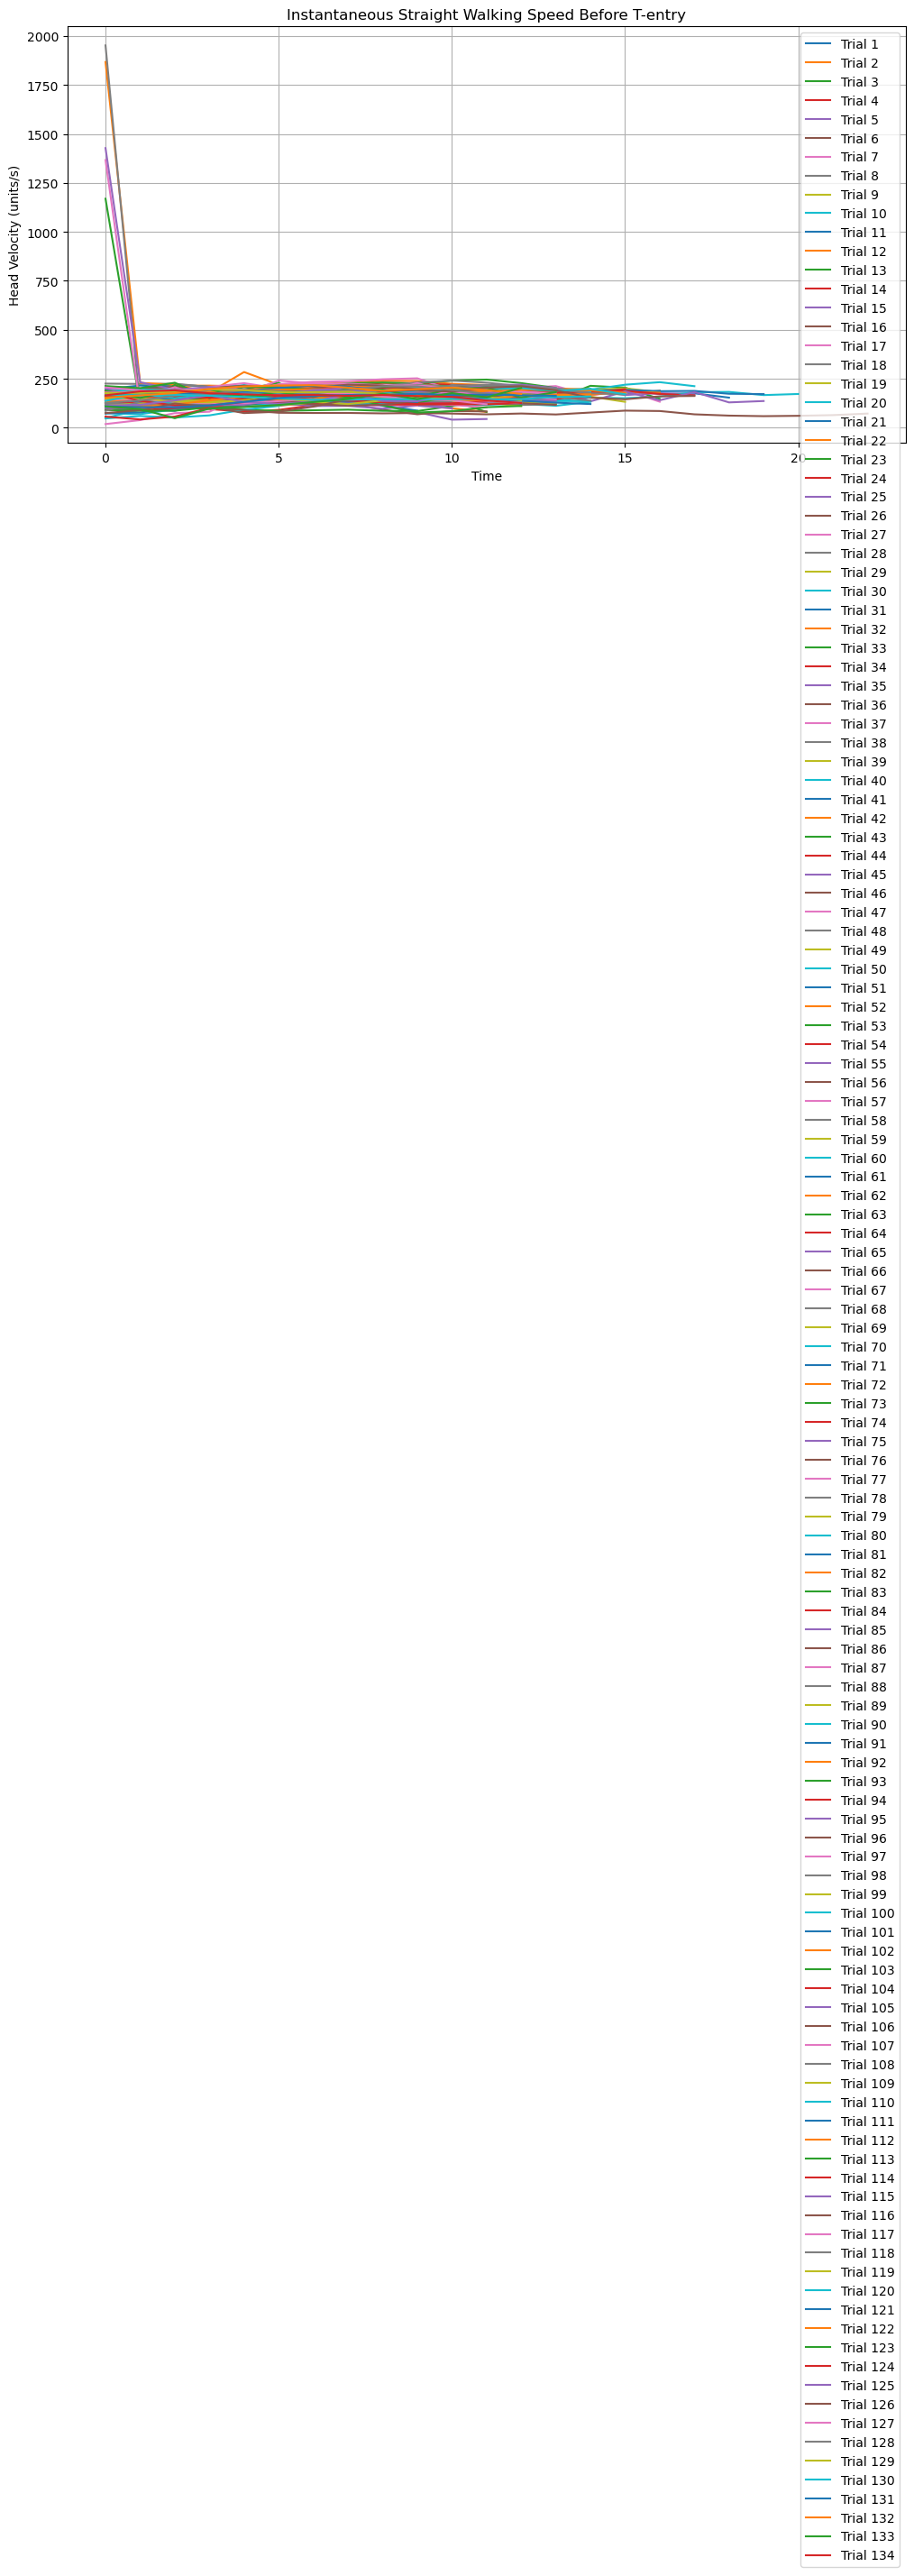

In [125]:
straight_walking_speed_list = straight_walking_speed(acceleration_df)
plot_straight_walking_speed(straight_walking_speed_list)


In [126]:
straight_walking_speed_list

[         speed
 0   122.815323
 1   122.492196
 2   118.172391
 3   112.891695
 4   111.544446
 5   120.971772
 6   143.783851
 7   174.043162
 8   161.784506
 9   167.708644
 10  144.095988
 11  137.334203
 12  152.178888,
          speed
 0   203.830470
 1   201.463604
 2   214.246878
 3   214.751108
 4   210.885835
 5   214.590930
 6   191.792241
 7   199.110600
 8   206.619845
 9   198.568744
 10  180.278754
 11  165.951993,
          speed
 0   178.221840
 1   178.659812
 2   186.144596
 3   189.361631
 4   188.198357
 5   189.377448
 6   185.899038
 7   179.593450
 8   176.979326
 9   170.848239
 10  160.829615,
          speed
 0   139.890115
 1   145.846148
 2   137.393295
 3   136.436455
 4   146.480931
 5   153.865422
 6   146.306517
 7   156.223729
 8   184.209777
 9   190.171600
 10  175.655794
 11  170.903267
 12  166.627958
 13  169.681590,
          speed
 0   159.576253
 1   162.071630
 2   164.863613
 3   168.503364
 4   173.330464
 5   180.049383
 6   175.537165
 7  

In [127]:
trial_data_list = []
trial_num = 0
record_trial = False
T_entry = False
Acc = False
Rej = False
quit = False
start_index = 0
walking_speed = np.NaN

for index, row in smoothed_df.iterrows():
    x = row['Head x']
    y = row['Head y']
    if Acc and y > 46: # Trial end with accept
        record_trial = False
        
    if record_trial: # in a trial          
        if (not T_entry) and y < 46:
            T_entry = True # enter T-junction
            
            # Calculate the straight walking metrics
            x0 = smoothed_df.iloc[start_index]['Head x']
            y0 = smoothed_df.iloc[start_index]['Head y']
            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            walking_speed = dist / (len(range(start_index, index)) + 1)
            
        # identify animal decision
        if T_entry:
            if y > 46:
                record_trial = False # trial end with no decision (mistakenly)
            
            if (not Acc) and (not Rej):
                if x > 309:
                    Acc = True # Accept the offer
                elif x < 282:
                    Rej = True 
                    record_trial = False # Trial end with reject
            elif Acc:
                if x < 282:
                    quit = True
                    record_trial = False # Trial end with quit
        
        #segment_head_x = analysis.loc[index - 12:index, 'Head xCoordinates'].reset_index(drop=True)
        #straight_walking_head_x[f'Track {seg_num}'] = segment_head_x
        #segment = analysis.loc[start_index:index]
        #straight_walking = pd.concat([straight_walking, segment])
        #in_segment = False
        #start_index = None
    else:
        if y > 90: # The start of each trial 
                        
            # Record last trial's decision
            decision = 'quit' if quit else 'Acc' if Acc else 'Rej' if Rej else np.NaN
            trial_data_list.append({'trial_num': trial_num, 'decision': decision, 'walking speed': walking_speed})
            
            
            # reset all flags
            record_trial = True
            T_entry = False
            Acc = False
            Rej = False
            quit = False
            trial_num += 1
            
            start_index = index

trial_data = pd.DataFrame(trial_data_list)

In [128]:
trial_data.head()

,trial_num,decision,walking speed
0,0,NaN,NaN
1,1,Rej,0.062900
2,2,Rej,1.857049
3,3,Rej,1.848810
4,4,Rej,2.051470


/var/folders/81/kqx_5t9n5vz_mq7d7n66fmdr0000gn/T/ipykernel_2504/3688015264.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = trial_data.groupby(['speed_bin', 'decision']).size().unstack(fill_value=0)


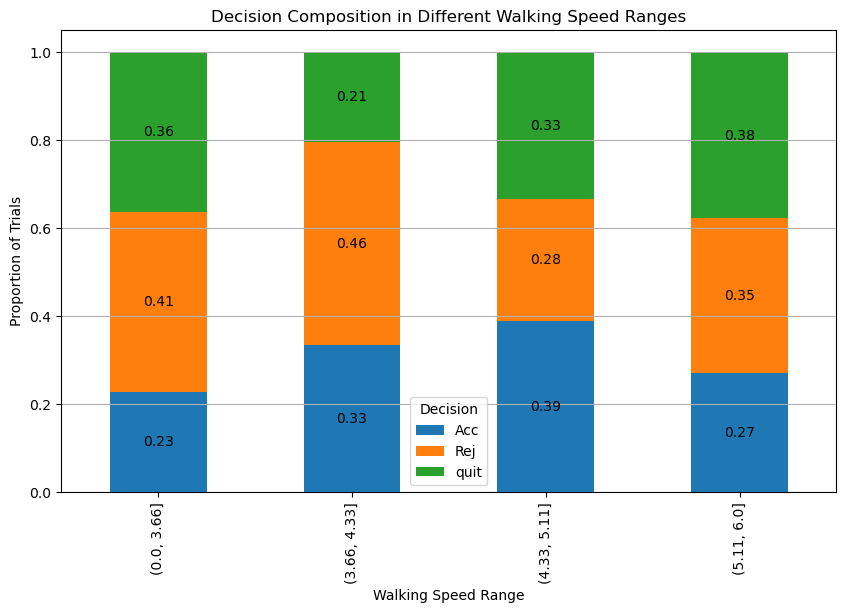

In [129]:
# Assuming trial_data is your DataFrame with columns 'trial_num', 'decision', and 'walking speed'
trial_data = pd.DataFrame({
    'trial_num': range(134),
    'decision': np.random.choice(['Acc', 'Rej', 'quit'], 134),
    'walking speed': np.random.uniform(3, 6, 134)
})

# Define walking speed bins
speed_bins = [0, 3.66, 4.33, 5.11, 6]
trial_data['speed_bin'] = pd.cut(trial_data['walking speed'], bins=speed_bins)

# Group by speed_bin and decision
grouped_data = trial_data.groupby(['speed_bin', 'decision']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plot the composition of decisions within each walking speed range
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotate the bars with proportions
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only annotate non-zero heights
        ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Walking Speed Range')
plt.ylabel('Proportion of Trials')
plt.title('Decision Composition in Different Walking Speed Ranges')
plt.legend(title='Decision')
plt.grid(axis='y')

plt.show()
